In [49]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#read data
data_dict=pickle.load(open('../final_project/final_project_dataset_modified.pkl','r'))
data_df=pd.DataFrame(data_dict)
bonus=data_df.loc[['bonus']].values
long_term_incentive=data_df.loc[['long_term_incentive']].values

In [50]:
#clean 'NaN'
data_reg=list(map(list,zip(bonus[0],long_term_incentive[0])))
data_reg=list([data_reg[i] for i in range(len(data_reg))\
             if 'NaN' not in data_reg[i]])
#transpose data
data_reg=list(map(np.array,zip(*data_reg)))
#turn string into int
data=[]
for i in range(len(data_reg)):
    data.append(map(int,data_reg[i]))
data_reg=np.array(data)    

In [51]:
#train_test_split
from sklearn.model_selection import train_test_split
feature_train,feature_test,target_train,target_test\
=train_test_split(data_reg[0].reshape(-1,1),data_reg[1],test_size=0.5,random_state=42)
##attention to reshape, it means 1 column, the row length conform to specific sample


In [72]:
# train linear regression model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(feature_train,target_train)
print 'r2 score on training set:',reg.score(feature_train,target_train)
print 'r2 score on test set:',reg.score(feature_test,target_test)
print 'slope:',reg.coef_

r2 score on training set: 0.156318687245
r2 score on test set: 0.0738350288566
slope: [ 0.14995671]


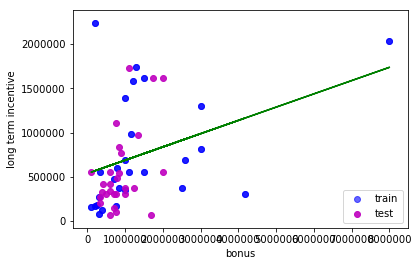

In [58]:
#print zip(feature_train,target_train)
plt.figure(1)
plt.scatter(feature_train,target_train,alpha=0.6,color='b',label='train')
plt.scatter(feature_test,target_test,alpha=0.9,color='m',label='test')


plt.plot(feature_train,reg.predict(feature_train),color='g')  
plt.xlabel('bonus')
plt.ylabel('long term incentive')
plt.legend()
plt.show()

In [59]:
#clean outlier, the max residual error points 10%

In [68]:
residual_error=abs(target_train-reg.predict(feature_train))
data_zip=zip(feature_train,target_train,residual_error)
data_sort=sorted(data_zip,key=lambda x: x[2],reverse=True)
data_clean=data_sort[int(len(data_sort)*0.1):]
data_clean=zip(*data_clean)

In [73]:
reg.fit(data_clean[0],data_clean[1])
print 'r2 score training data after clean:',reg.score(data_clean[0],data_clean[1])
print 'r2 score test data:',reg.score(feature_test,target_test)
print 'slope:',reg.coef_

r2 score training data after clean: 0.343316193427
r2 score test data: 0.154880206447
slope: [ 0.18415202]


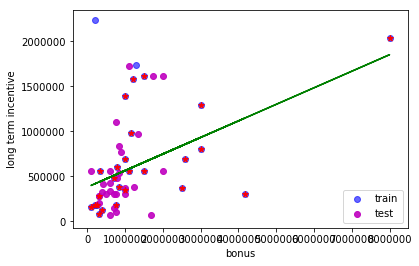

In [74]:
plt.figure(2)
plt.scatter(feature_train,target_train,alpha=0.6,color='b',label='train')
plt.scatter(feature_test,target_test,alpha=0.9,color='m',label='test')

plt.scatter(data_clean[0],data_clean[1],marker='*',color='r')
plt.plot(data_clean[0],reg.predict(data_clean[0]),color='g')  
plt.xlabel('bonus')
plt.ylabel('long term incentive')
plt.legend()
plt.show()